In [85]:
import numpy as np
import pandas as pd

from time import perf_counter
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

pd.set_option('display.max_columns', None)

In [86]:
all_df = pd.read_csv('cleveland.csv')

all_df = all_df.rename({'num':'disease'}, axis=1)
all_df['disease'] = all_df.disease.apply(lambda x: min(x, 1.0))

In [87]:
all_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


## Cleaning data

In [88]:
all_df = all_df.replace({'?':np.nan})
all_df = all_df.dropna()
all_df = all_df.astype(float)
all_df = all_df.reset_index(drop=True)

#### Standardize the data

In [89]:
sd_df=(all_df-all_df.mean())/all_df.std()

In [90]:
sd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,0.934603,0.689930,-2.236854,0.749116,-0.275978,2.426332,1.008496,0.017465,-0.695246,1.067164,2.260330,-0.720760,0.654772,-0.923779
1,1.376605,0.689930,0.872408,1.593577,0.743301,-0.410757,1.008496,-1.813274,1.433497,0.381130,0.642696,2.474249,-0.892713,1.078866
2,1.376605,0.689930,0.872408,-0.658320,-0.352904,-0.410757,1.008496,-0.897904,1.433497,1.324427,0.642696,1.409246,1.170601,1.078866
3,-1.938409,0.689930,-0.164013,-0.095345,0.050961,-0.410757,-1.001728,1.630258,-0.695246,2.096215,2.260330,-0.720760,-0.892713,-0.923779
4,-1.496407,-1.444542,-1.200433,-0.095345,-0.833696,-0.410757,1.008496,0.976423,-0.695246,0.295376,-0.974938,-0.720760,-0.892713,-0.923779


In [91]:
classLabels = all_df[['disease']]
train_df = sd_df.drop(columns='disease')

In [92]:
num_components = len(train_df.columns)
pca = PCA(n_components=num_components)
transformed_coords = pca.fit_transform(train_df)
transf_df = pd.DataFrame(transformed_coords)
# display(transf_df)

In [93]:
from sklearn.linear_model import LogisticRegression
t1_start = perf_counter()
X = transf_df.values
y = classLabels.disease.values

lm = LogisticRegression()
lm.fit(X, y)

# print(lm.intercept_)
# print(lm.coef_)

y_pred = lm.predict(X)

t1_end = perf_counter()

display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

C:\Users\mhetr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'predicted range: [0.00,1.00]'

'precision = [0.84431138 0.85384615]'

'recall = [0.88125    0.81021898]'

'f-score = [0.86238532 0.83146067]'

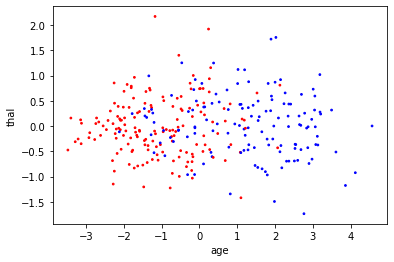

In [94]:
# Plot the dataset colored by prediction
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(transf_df[0], transf_df[12], c=color, s=3)
plt.xlabel('age')
plt.ylabel('thal')

# display(lm.intercept_)
# display(lm.coef_)

b0 = lm.intercept_
b = lm.coef_[0]

Text(0, 0.5, 'thal')

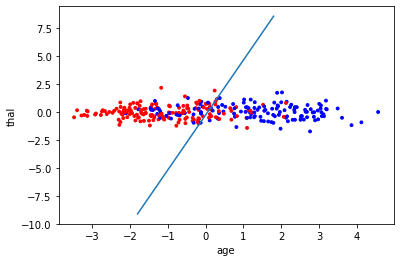

In [95]:
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(transf_df[0], transf_df[12], c=color, s=8)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [-1.8, 1.8]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb) 
plt.xlabel('age')
plt.ylabel('thal')

Text(0, 0.5, 'thal')

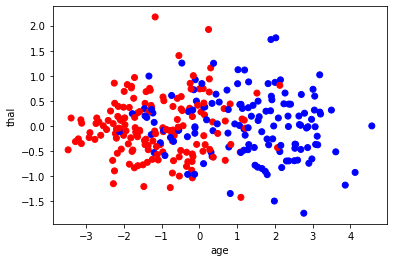

In [96]:
X = transf_df[[0, 10]]
y = classLabels.disease.values

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(transf_df[0], transf_df[12], c=color)
plt.xlabel('age')
plt.ylabel('thal')

'precision = [0.79661017 0.84166667]'

'recall = [0.88125    0.73722628]'

'f-score = [0.83679525 0.78599222]'

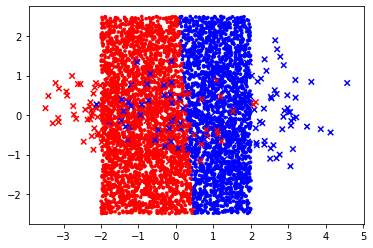

In [97]:
from sklearn import svm
t2_start = perf_counter()

clf = svm.SVC(kernel='linear', class_weight={0:1})
clf.fit(X, y)

y_pred = clf.predict(X)

t2_end = perf_counter()

p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

# add random points
import random
newx = []
newy = []
newlabel = []
for _ in range(5000):
# for _ in range(5000):
    px = random.uniform(-2,2)
    py = random.uniform(-2.5,2.5)
    plabel = clf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(transf_df[0], transf_df[11], c=color, s=30, marker='x')

C:\Users\mhetr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'f-score = [0.83333333 0.74358974]'

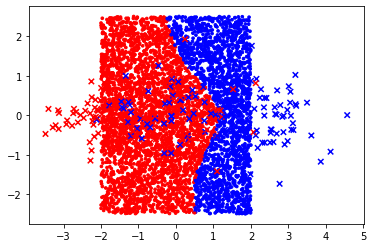

In [98]:
# Try changing the degree
clf = svm.SVC(kernel='poly', degree=3)
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))

# add random points
import random
newx = []
newy = []
newlabel = []
for _ in range(5000):
# for _ in range(5000):
    px = random.uniform(-2,2)
    py = random.uniform(-2.5,2.5)
    plabel = clf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7)

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(transf_df[0], transf_df[12], c=color, s=30, marker='x')



C:\Users\mhetr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'f-score = [0.83908046 0.77235772]'

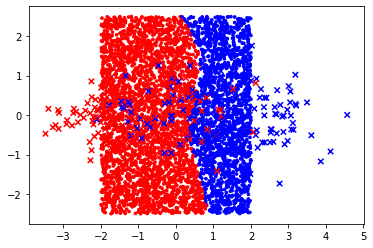

In [99]:
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))

# add random points
import random
newx = []
newy = []
newlabel = []
for _ in range(5000):
# for _ in range(5000):
    px = random.uniform(-2,2)
    py = random.uniform(-2.5,2.5)
    plabel = clf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7)

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(transf_df[0], transf_df[12], c=color, s=30, marker='x')

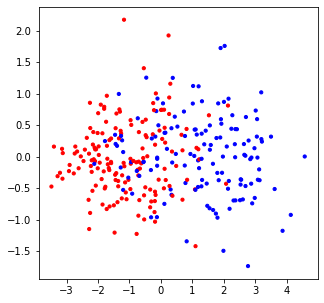

In [100]:
plt.figure(figsize=(5, 5))
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(transf_df[0], transf_df[12], c=color, s=10)

C:\Users\mhetr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'f-score = [0.83333333 0.74358974]'

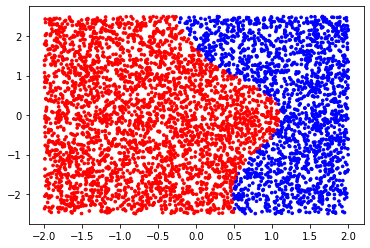

In [104]:
clf = svm.SVC(kernel='linear')
clf = svm.SVC(kernel='poly', degree=3) # try degree=2,4
# clf = svm.SVC(kernel='rbf', gamma=1) # try gamma=.1,1
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))

# add random points
import random
newx = []
newy = []
newlabel = []
for _ in range(5000):
# for _ in range(5000):
    px = random.uniform(-2,2)
    py = random.uniform(-2.5,2.5)
    plabel = clf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

plt.figure()
color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7)

### Is there a difference in runtime performance?

In [102]:
print('Logistic regression runtime: ', t1_end - t1_start)
print('SVM runtime: ', t2_end - t2_start)
print('LogReg/SVM runtime: ', (t1_end - t1_start)/(t2_end - t2_start))

Logistic regression runtime:  0.00406349999957456
SVM runtime:  0.009337700000287441
LogReg/SVM runtime:  0.4351714018922726
